In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import re
from pathlib import Path

import mplhep as hep
hep.style.use(hep.style.ATLAS)

from utils import read_perf_analyzer_output, plot_backend_compare
from utils import plot_backend, check_inputpath, check_outputpath

# 1 instance on 4 GPUs

In [2]:
custom_backend_results_path = "../results-Feb22-test4gpus-1inst/1insts_4gpus/perf_analyzer_1insts_4gpus_sync.csv"
pd_custom = read_perf_analyzer_output(custom_backend_results_path)
var_name = "Inferences/Second"
custom_backend_results = {
    "Concurrency": pd_custom["Concurrency"],
    var_name: pd_custom[var_name]
}

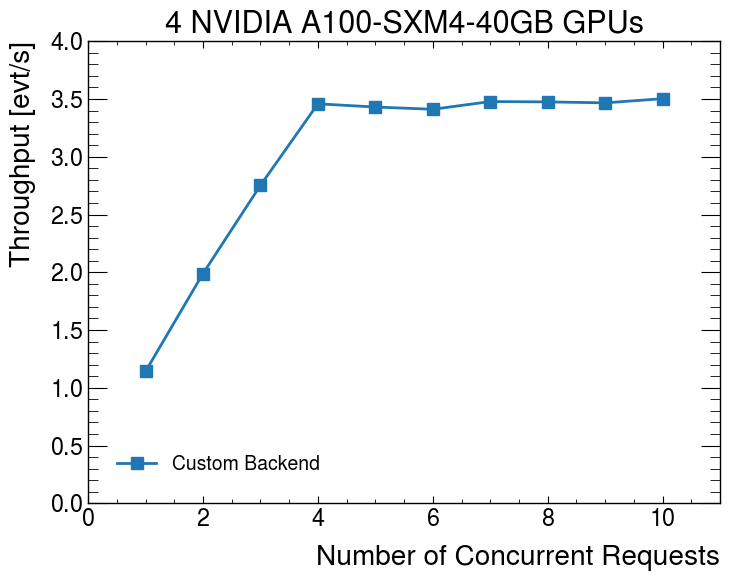

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(custom_backend_results["Concurrency"], custom_backend_results[var_name], label="Custom Backend", marker="s")

ax.set_xlim(0, 11)
ax.set_xlabel("Number of Concurrent Requests")
ax.set_ylabel("Throughput [evt/s]")
ax.set_title("4 NVIDIA A100-SXM4-40GB GPUs", fontsize=22)
ax.set_ylim(0, 4.0)
ax.legend()
# fig.savefig("throughput_vs_concurrency_1inst_1gpu.pdf", dpi=600, bbox_inches="tight")
# fig.savefig("throughput_vs_concurrency_1inst_1gpu.png", dpi=600, bbox_inches="tight")
